In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from locale import atof, setlocale, LC_NUMERIC

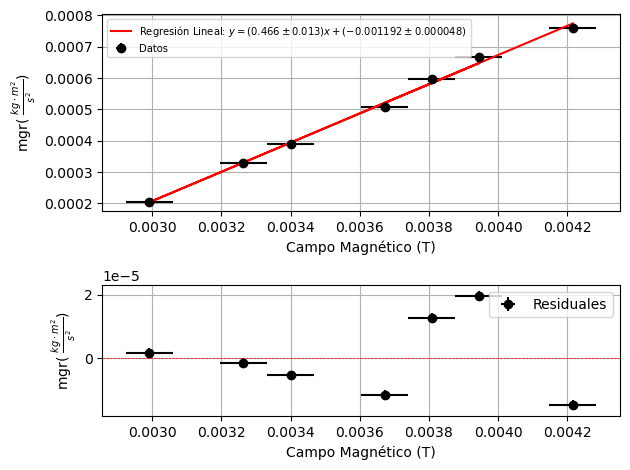

In [78]:
# Configurar el locale para interpretar las comas como decimales
setlocale(LC_NUMERIC, 'es_ES.UTF-8')  # Puedes ajustar el local según tu configuración

# Función para la regresión lineal
def linear_model(x, m, b):
    return m * x + b

# Importar datos desde un archivo CSV con pandas
ruta_archivo = "C:\\Users\\ALEJANDRO\\Documents\\APM 2023\\SEMESTRE 6\\LABORATORIO INTERMEDIO\\EXPERIMENTOS\\TORQUE MAGNÉTICO\DATOS CSV\\act1.csv"  # Reemplaza con la ruta real de tu archivo
df = pd.read_csv(ruta_archivo, sep=';', decimal=',')

# Restaurar el locale después de leer el archivo CSV
setlocale(LC_NUMERIC, 'C')

# Extraer datos de las columnas
y_data = 9.790*(df['Distancia Bola - masa (cm)']/100)*(1.6/1000)
x2_data = (((4*np.pi)*(10**(-7)))*df['Corriente (A)'] *195 * (0.109**2))/(((0.109**2) + (0.138**2)**(3/2)))  # Suponiendo que hay una columna con las incertidumbres de Y
x_data = df["Corriente (A)"] * 1.36*(10**-3)

erry = 9.790*(1.6/1000)*(0.1/1000)
errx = 0.05* 1.36*(10**-3)

# Ajuste de la regresión lineal y estimación de incertidumbres
params, covariance = curve_fit(linear_model, x_data, y_data)

# Parámetros de la regresión lineal
m, b = params

# Incertidumbres de los parámetros
sigma_m, sigma_b = np.sqrt(np.diag(covariance))

# Crear el modelo lineal con los parámetros ajustados
y_fit = linear_model(x_data, m, b)

residuales = y_data - y_fit

# Crear el gráfico con barras de error
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 2]}, sharex=False)

ax1.errorbar(x_data, y_data, xerr = errx, yerr=erry, fmt='o', label='Datos', color = "black")
ax1.plot(x_data, y_fit, label=f'Regresión Lineal: $y = ({m:.3f} \pm {sigma_m:.3f})x + ({b:.6f} \pm {sigma_b:.6f})$', color = "red")

# Agregar incertidumbres a la leyenda
ax1.legend(fontsize = 7.2)

# Mostrar el gráfico
ax1.set_ylabel('mgr' + '(' + r' $\frac{kg \cdot m^2}{s^2}$' + ')')
ax1.set_xlabel('Campo Magnético (T)')
ax1.grid(True)

# Subplot de residuales
ax2.errorbar(x_data, residuales, xerr = errx, yerr = erry, fmt='o', color='black', label='Residuales')
ax2.axhline(0, color='red', linestyle='--', linewidth=0.5)

# Leyenda para el subplot de residuales
ax2.legend()

# Ajustes del subplot de residuales
ax2.set_xlabel('Campo Magnético (T)')
ax2.set_ylabel('mgr' + '(' + r' $\frac{kg \cdot m^2}{s^2}$' + ')')
ax2.grid(True)


plt.tight_layout()
plt.show()


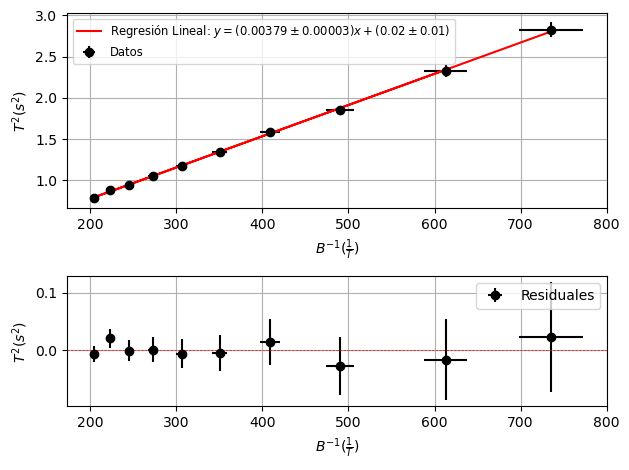

In [82]:
# Importar datos desde un archivo CSV con pandas
ruta_archivo = "C:\\Users\\ALEJANDRO\\Documents\\APM 2023\\SEMESTRE 6\\LABORATORIO INTERMEDIO\\EXPERIMENTOS\\TORQUE MAGNÉTICO\DATOS CSV\\act2.csv"  # Reemplaza con la ruta real de tu archivo
df = pd.read_csv(ruta_archivo, sep=';', decimal=',')

# Restaurar el locale después de leer el archivo CSV
setlocale(LC_NUMERIC, 'C')

# Extraer datos de las columnas
y_data = df['T^2']
x_data = 1/(df['Corriente (I)']* 1.36*(10**-3))  # Suponiendo que hay una columna con las incertidumbres de Y

erry = 2*(df["Periodo (s)"]**3) * 0.01
errx = (1/((1.36*(10**-3))*(df["Corriente (I)"])**2)) * 0.05

# Ajuste de la regresión lineal y estimación de incertidumbres
params, covariance = curve_fit(linear_model, x_data, y_data)

# Parámetros de la regresión lineal
m, b = params

# Incertidumbres de los parámetros
sigma_m, sigma_b = np.sqrt(np.diag(covariance))

# Crear el modelo lineal con los parámetros ajustados
y_fit = linear_model(x_data, m, b)

residuales = y_data - y_fit

# Crear el gráfico con barras de error
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 2]}, sharex=False)

ax1.errorbar(x_data, y_data, xerr = errx, yerr=erry, fmt='o', label='Datos', color = "black")
ax1.plot(x_data, y_fit, label=f'Regresión Lineal: $y = ({m:.5f} \pm {sigma_m:.5f})x + ({b:.2f} \pm {sigma_b:.2f})$', color = "red")

# Agregar incertidumbres a la leyenda
ax1.legend(fontsize = "small")

# Mostrar el gráfico
ax1.set_xlabel(r'$B^{-1}$' + r'$(\frac{1}{T})$')
ax1.set_ylabel(f'$T^2$' + '(' + f'$s^2$' + ')')
ax1.grid(True)

# Subplot de residuales
ax2.errorbar(x_data, residuales, xerr = errx, yerr = erry, fmt='o', color='black', label='Residuales')
ax2.axhline(0, color='red', linestyle='--', linewidth=0.5)

# Leyenda para el subplot de residuales
ax2.legend()

# Ajustes del subplot de residuales
ax2.set_xlabel(r'$B^{-1}$' + r'$(\frac{1}{T})$')
ax2.set_ylabel(f'$T^2$' + '(' + f'$s^2$' + ')')
ax2.grid(True)


plt.tight_layout()
plt.show()


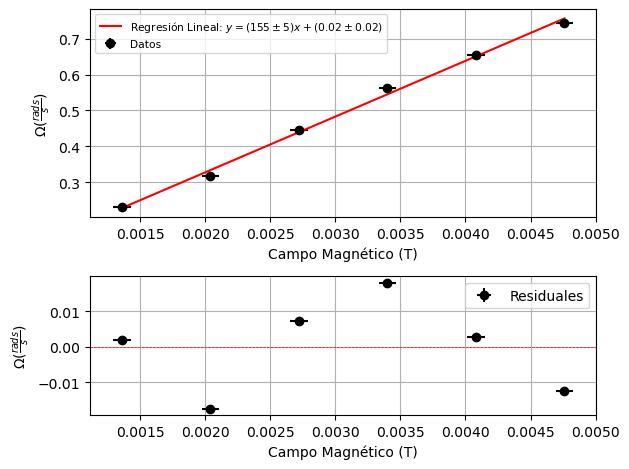

In [88]:
# Importar datos desde un archivo CSV con pandas
ruta_archivo = "C:\\Users\\ALEJANDRO\\Documents\\APM 2023\\SEMESTRE 6\\LABORATORIO INTERMEDIO\\EXPERIMENTOS\\TORQUE MAGNÉTICO\DATOS CSV\\act3.csv"  # Reemplaza con la ruta real de tu archivo
df = pd.read_csv(ruta_archivo, sep=';', decimal=',')

# Restaurar el locale después de leer el archivo CSV
setlocale(LC_NUMERIC, 'C')

# Extraer datos de las columnas
x_data = df['Corriente'] * 1.36*(10**-3)
y_data = (2*np.pi)/df['Periodo traslación'] # Suponiendo que hay una columna con las incertidumbres de Y

erry = (4*np.pi * 0.001)/(df["Periodo traslación"]**2)
errx = 1.36*(10**-3) * 0.05

# Ajuste de la regresión lineal y estimación de incertidumbres
params, covariance = curve_fit(linear_model, x_data, y_data)

# Parámetros de la regresión lineal
m, b = params

# Incertidumbres de los parámetros
sigma_m, sigma_b = np.sqrt(np.diag(covariance))

# Crear el modelo lineal con los parámetros ajustados
y_fit = linear_model(x_data, m, b)

residuales = y_data - y_fit

# Crear el gráfico con barras de error
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 2]}, sharex=False)

ax1.errorbar(x_data, y_data, xerr = errx, yerr=erry, fmt='o', label='Datos', color = "black")
ax1.plot(x_data, y_fit, label=f'Regresión Lineal: $y = ({m:.0f} \pm {sigma_m:.0f})x + ({b:.2f} \pm {sigma_b:.2f})$', color = "red")

# Agregar incertidumbres a la leyenda
ax1.legend(fontsize = 7.7)

# Mostrar el gráfico
ax1.set_xlabel('Campo Magnético (T)')
ax1.set_ylabel(r'$\Omega$' + r'$(\frac{rads}{s})$')
ax1.grid(True)

# Subplot de residuales
ax2.errorbar(x_data, residuales, xerr = errx, yerr = erry, fmt='o', color='black', label='Residuales')
ax2.axhline(0, color='red', linestyle='--', linewidth=0.5)

# Leyenda para el subplot de residuales
ax2.legend()

# Ajustes del subplot de residuales
ax2.set_xlabel('Campo Magnético (T)')
ax2.set_ylabel(r'$\Omega$' + r'$(\frac{rads}{s})$')
ax2.grid(True)


plt.tight_layout()
plt.show()
